# Task 1

In [128]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [140]:
def plot_histogram(image_path, ax):
    """Plot the histogram of an image."""
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    ax.hist(img_array.ravel(), bins=256, color='gray', alpha=0.7)
    ax.set_title(f'Histogram of {image_path}')
    ax.set_xlim(0, 255)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

In [144]:
def compute_metrics(hist1, hist2):
    """Compute various metrics between two histograms."""
    hist1, hist2 = np.array(hist1), np.array(hist2)
    hist1, hist2 = hist1 / np.sum(hist1), hist2 / np.sum(hist2)
    
    # Ensure histograms have the same length
    max_len = max(len(hist1), len(hist2))
    hist1 = np.pad(hist1, (0, max_len - len(hist1)), mode='constant')
    hist2 = np.pad(hist2, (0, max_len - len(hist2)), mode='constant')
    
    # Compute metrics
    epsilon = 1e-10
    hist1 = np.clip(hist1, epsilon, 1.0)
    hist2 = np.clip(hist2, epsilon, 1.0)
    
    cross_entropy = -np.sum(hist1 * np.log(hist2))
    
    kl_divergence = np.sum(hist1 * np.log(hist1 / hist2))
    m = 0.5 * (hist1 + hist2)
    js_divergence = 0.5 * (np.sum(hist1 * np.log(hist1 / m)) + np.sum(hist2 * np.log(hist2 / m)))
    ks_stat, ks_p_value = ks_2samp(hist1, hist2)
    
    return cross_entropy,kl_divergence, js_divergence, ks_stat, ks_p_value

In [136]:
# File paths
image_paths = ['penguin1.png', 'penguin2.png']

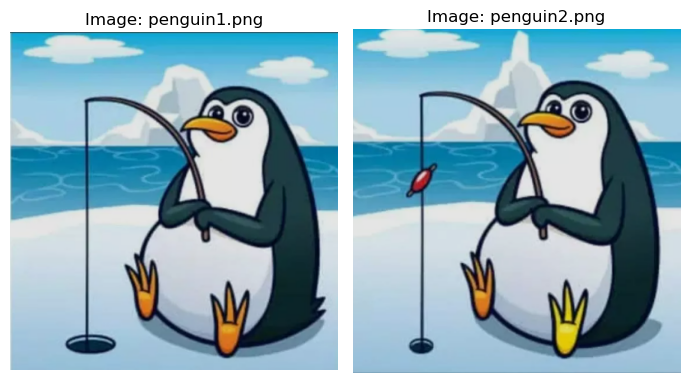

In [138]:
#1 Prepare two images that are fairly similar.
fig, axes = plt.subplots(1, len(image_paths), figsize=(7, 7))
for ax, image_path in zip(axes, image_paths):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f'Image: {image_path}')
    ax.axis('off')
plt.tight_layout()
plt.show()

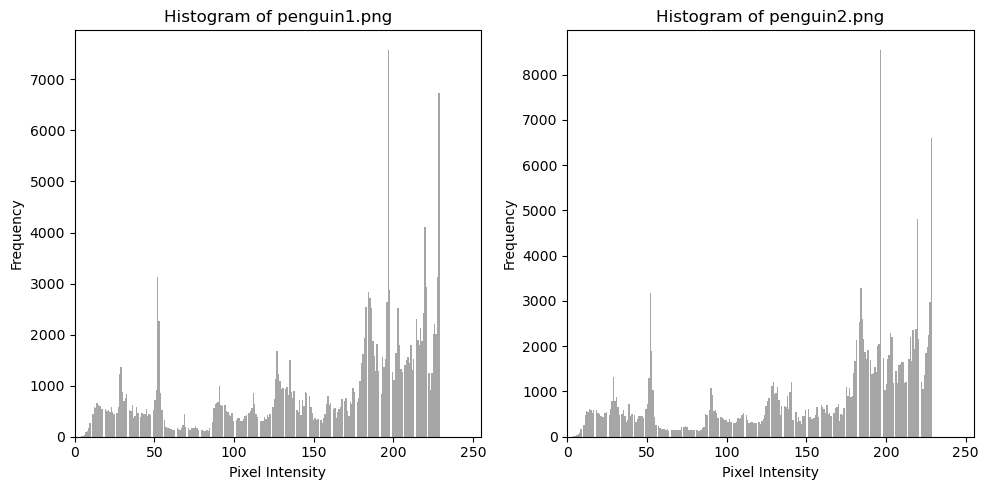

In [142]:
#2 Draw a histogram of each image in the previous task is somehow the distribution of the image. Plot the histogram of each image.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for image_path, ax in zip(image_paths, axes):
    plot_histogram(image_path, ax)
plt.tight_layout()

# Save the histograms to a file
plt.savefig('histograms_comparison.png', dpi=100)  
plt.show()

In [146]:
# Align histograms
hist1 = np.histogram(np.array(Image.open(image_paths[0]).convert('L')).ravel(), bins=np.arange(257))[0]
hist2 = np.histogram(np.array(Image.open(image_paths[1]).convert('L')).ravel(), bins=np.arange(257))[0]

#3 Compare the distributions between both images with Kolmogorov-Smirnov, Cross-Entropy, KL-Divergence, and JS-Divergence.
cross_entropy,kl_divergence, js_divergence, ks_stat, ks_p_value = compute_metrics(hist1, hist2)
print(f'Kolmogorov-Smirnov Statistic: {ks_stat}, p-value: {ks_p_value}')
print(f'Cross-Entropy: {cross_entropy}')
print(f'KL-Divergence: {kl_divergence}')
print(f'JS-Divergence: {js_divergence}')

Kolmogorov-Smirnov Statistic: 0.04296875, p-value: 0.9726060102257182
Cross-Entropy: 5.06742227809366
KL-Divergence: 0.026940525960668642
JS-Divergence: 0.006448779847129416


# Task 2

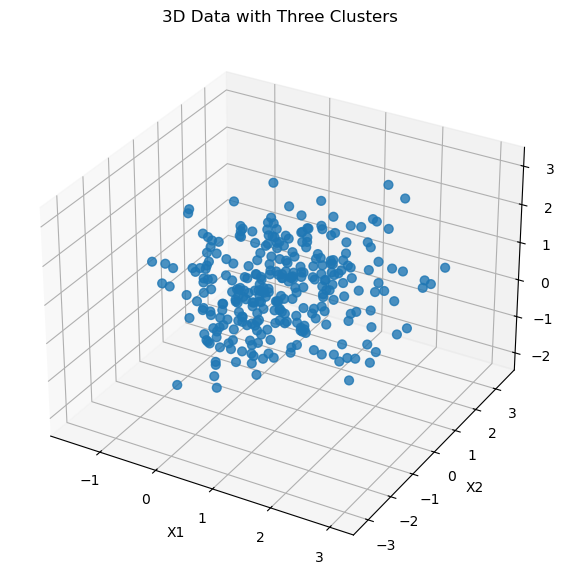

In [148]:
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
# Set random seed for reproducibility
np.random.seed(42)

#1 Create a random dataset in 3D space that has three clusters.
n_samples = 300
centers = [(0, 0, 0), (1, 1, 1), (1, -1, 1)]  # Closer cluster centers
cluster_std = 0.8  # Increased standard deviation for overlap

# Generate data
X = np.vstack([
    np.random.normal(loc=center, scale=cluster_std, size=(n_samples // 3, 3))
    for center in centers
])

# Plot the data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=40, alpha=0.8)
ax.set_title('3D Data with Three Clusters')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.savefig('clusters.png', dpi=100)  
plt.show()

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


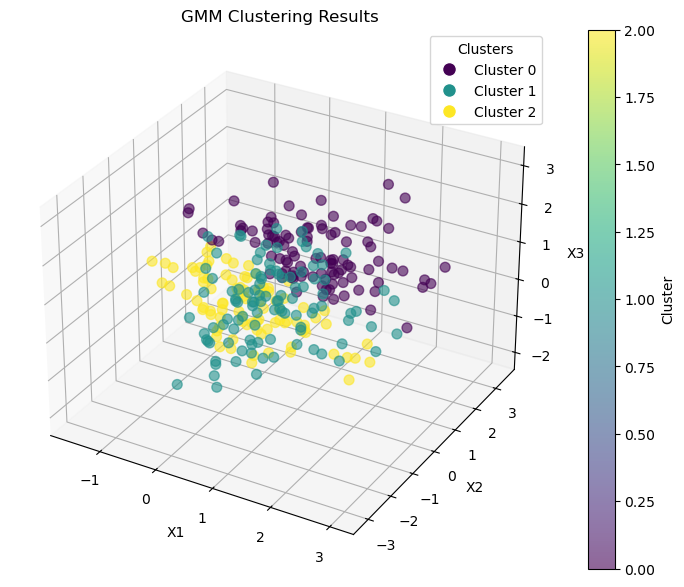

In [150]:
#2 By using Expectation Maximization algorithms, try to implement Gaussian Mixture Modeling (GMM) clustering algorithm and cluster these data correctly.
gmm = GaussianMixture(n_components=3, max_iter=100, random_state=42)
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Plot the clustered data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6)

# Set titles and labels
ax.set_title('GMM Clustering Results')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

# Add custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.get_cmap('viridis')(i / 2), markersize=10, label=f'Cluster {i}') for i in range(3)]
ax.legend(handles=handles, title='Clusters')
plt.savefig('gmm.png', dpi=100)  
plt.show()


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


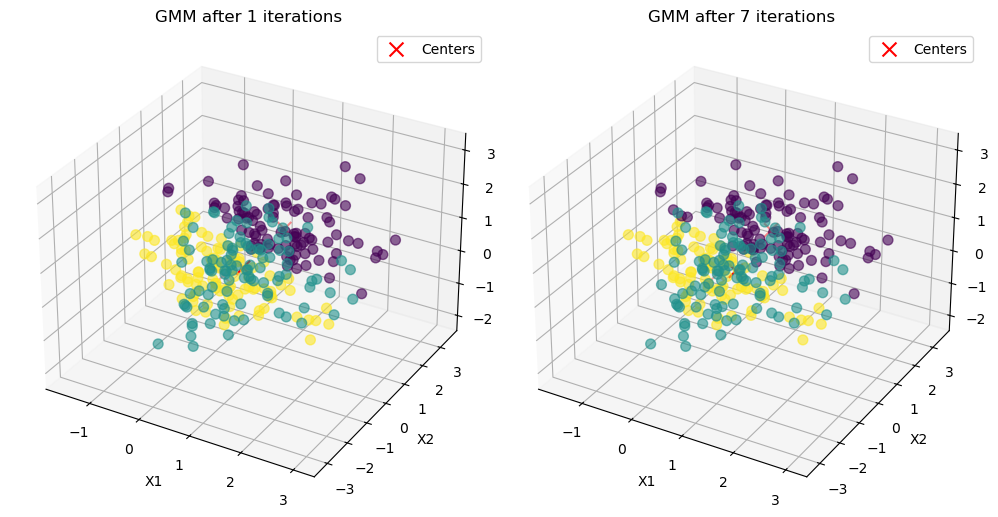

In [152]:
#3 Visualize at least two E and M steps in between.
def plot_gmm_steps(X, n_components, steps):
    fig = plt.figure(figsize=(10, 7))
    
    for i, step in enumerate(steps):
        # Fit GMM model
        gmm = GaussianMixture(n_components=n_components, max_iter=step, random_state=42)
        gmm.fit(X)
        
        # Predict the cluster labels
        labels = gmm.predict(X)
        
        # Plot the clustered data
        ax = fig.add_subplot(1, len(steps), i + 1, projection='3d')
        scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6)
        
        # Plot the cluster centers
        centers = gmm.means_
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=100, label='Centers')
        
        # Set titles and labels
        ax.set_title(f'GMM after {step} iterations')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('X3')

        # Add legend
        ax.legend()
        
    plt.tight_layout()
    plt.savefig('emsteps.png', dpi=100)
    plt.show()

steps = [1, 7]  # Visualize after 1 and 7 iterations

# Plot GMM steps
plot_gmm_steps(X, n_components=3, steps=steps)
